<a href="https://colab.research.google.com/github/debojit11/ml_nlp_dl_transformers/blob/main/ML_week_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 6: K-Nearest Neighbors (KNN)

# **SECTION 1: Welcome & Objectives**

In [1]:
print("Welcome to Week 6!")
print("This week, you'll:")
print("- Learn about K-Nearest Neighbors (KNN): a simple yet powerful algorithm")
print("- Understand how distance-based classification works")
print("- Compare KNN with previous models like Logistic Regression and Random Forest")

Welcome to Week 6!
This week, you'll:
- Learn about K-Nearest Neighbors (KNN): a simple yet powerful algorithm
- Understand how distance-based classification works
- Compare KNN with previous models like Logistic Regression and Random Forest


# **SECTION 2: Why KNN?**

### Why KNN?
KNN is simple:
- No training phase — it memorizes the data.
- To predict, it looks at the **K closest examples** and chooses the majority label.

➡️ It's like asking your neighbors what they think — and going with the majority.

# **SECTION 3: Reuse SMS Spam Dataset**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', names=["label", "message"])
data['label_num'] = data['label'].map({'ham': 0, 'spam': 1})

In [4]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['message'])
y = data['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤝 Week 6 – K-Nearest Neighbors (KNN)

---

### 🚨 Why Not Just Use Logistic Regression or Trees?

- Logistic Regression is **linear** — decision boundaries are straight lines.
- Trees are **non-linear** but can still be unstable and overfit.
  
➡️ What if we could just look at similar past examples and **copy their answer**?

---

## 📍 Enter K-Nearest Neighbors

### 🌟 Core Idea:
- Store the entire training dataset.
- To predict a new point:
  - Measure distance to all training points.
  - Pick the **k closest points**.
  - Take a **majority vote** (classification) or average (regression).

> KNN is like asking your neighbors for advice — closest neighbors usually know best.

---

### 🧮 How It Works

1. Choose `k` (number of neighbors).
2. Compute distance from the input to every training point.
3. Find the `k` nearest ones.
4. Return the majority label among them.

---

### 📐 Math (Distance Intuition)

Common distance metrics:
- **Euclidean (default)**:  
  $$
  d(x, y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}
  $$
- **Manhattan**:  
  $$
  d(x, y) = \sum_{i=1}^{n}|x_i - y_i|
  $$
- **Cosine similarity** (good for text):  
  $$
  \text{cos}(x, y) = \frac{x \cdot y}{\|x\|\|y\|}
  $$

---

### 🤔 Choosing K

- Small `k`: Model is flexible, but may overfit.
- Large `k`: More stable, but can underfit.

> Try `k = 3, 5, 7, 10` and compare results.

---

# **SECTION 4: Train KNN Model**

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [7]:
print("--- KNN (k=5) ---")
print(classification_report(y_test, y_pred_knn))

--- KNN (k=5) ---
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       966
           1       1.00      0.36      0.53       149

    accuracy                           0.91      1115
   macro avg       0.96      0.68      0.74      1115
weighted avg       0.92      0.91      0.90      1115




## 📊 Model Evaluation – Same Toolkit

We use:
- **Confusion matrix**
- **Precision, Recall, F1**
- **ROC Curve + AUC**

These help us understand how good our KNN model really is.

---

# **SECTION 5: Evaluation – Confusion Matrix & ROC Curve**

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

## Confusion matrix

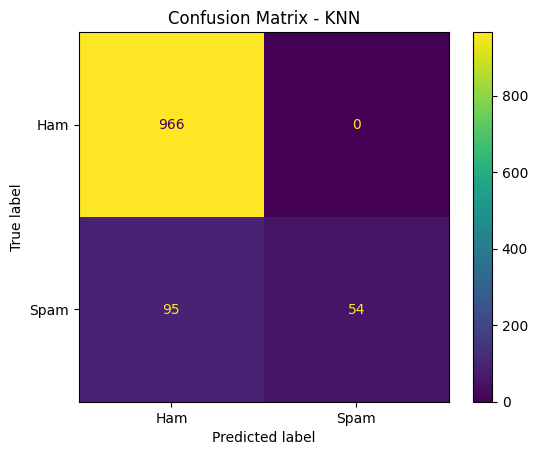

In [9]:
cm = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm, display_labels=['Ham', 'Spam']).plot()
plt.title("Confusion Matrix - KNN")
plt.show()

## ROC curve

In [10]:
y_probs = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

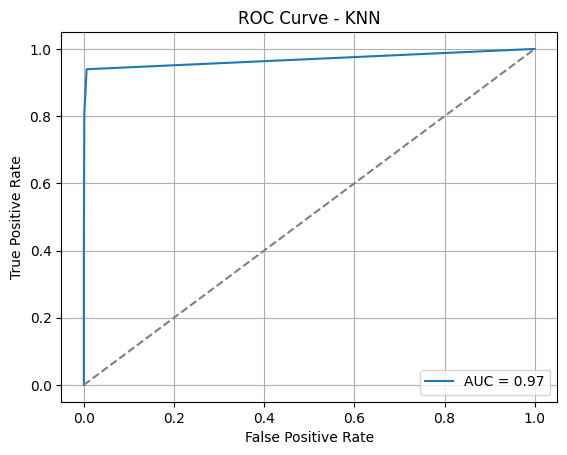

In [11]:
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.grid(True)
plt.show()


### 🧠 TL;DR

| Model              | Strengths                         | Weaknesses                   |
|--------------------|------------------------------------|-------------------------------|
| Logistic Regression| Simple, fast                      | Assumes linear boundaries     |
| Decision Trees     | Non-linear, interpretable         | Overfits easily               |
| Random Forest      | Robust, strong ensemble           | Slower, harder to explain     |
| KNN                | Very intuitive, no training needed| Slow on large datasets, sensitive to scale |

---

You now know one of the most **intuitive ML models** that makes decisions based on **similarity**.  
Next week, we’ll enter the world of **Support Vector Machines (SVM)** — where we **draw optimal boundaries** between classes using the power of geometry and margins 📐🧠

# **SECTION 6: What’s Coming Next?**

### What’s Next in Week 7?
Now you’ve seen how models like KNN can classify just by comparing neighbors.

➡️ Next week, we’ll explore **Support Vector Machines (SVMs)** — a powerful technique that tries to draw the **best boundary** between classes using margins.

We’ll see how it handles both **linear and non-linear** cases and compare it to models we've used so far.

# **SECTION 7: Exercises**

### Exercises:
1. Try different values of `k` like 3, 7, or 10 and compare performance.
2. Use `CountVectorizer` instead of `TfidfVectorizer`.
3. Explore different distance metrics using `metric='manhattan'` or `metric='cosine'`.
4. Visualize the ROC curve for different values of `k`.